<a href="https://colab.research.google.com/github/paulynamagana/AFDB_notebooks/blob/main/AFDB_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Accessing AlphaFold DB structures via API**

<img src="https://github.com/paulynamagana/AFDB_notebooks/blob/main/api.png?raw=true" height="200" align="right">

Welcome to this notebook! In this tutorial, we will walk you through the process of accessing the AlphaFold Protein Structure Database using the API (Application Programming Interface). For more information on the API endpoints, visit the docs on the [AlphaFold Database](https://alphafold.ebi.ac.uk/api-docs)

An API serves as a bridge, enabling seamless communication between different software systems. With AFDB API, you can easily retrieve information about protein structures predicted by AlphaFold, such as URLs to model files (mmCIF, bCIF and PDB), models quality estimates, and other useful information. All the API endpoints are keyed on UniProt accessions.

To use this Colab notebook, you will need to have a Google account and be logged in to Google Colab.

<br>




---


  ## How to use Google Colab <a name="Quick Start"></a>
1. To run a code cell, click on the cell to select it. You will notice a play button (▶️) on the left side of the cell. Click on the play button or press Shift+Enter to run the code in the selected cell.
2. The code will start executing, and you will see the output, if any, displayed below the code cell.
3. Move to the next code cell and repeat steps 2 and 3 until you have executed all the desired code cells in sequence.
4. The currently running step is indicated by a circle with a stop sign next to it.
If you need to stop or interrupt the execution of a code cell, you can click on the stop button (■) located next to the play button.

*Remember to run the code cells in the correct order, as their execution might depend on variables or functions defined in previous cells. You can modify the code in a code cell and re-run it to see updated results.*

## Contact us

If you experience any bugs please contact afdbhelp@ebi.ac.uk

---

[
  {
    "entryId": "AF-P00520-F1",
    "gene": "Abl1",
    "uniprotAccession": "P00520",
    "uniprotId": "ABL1_MOUSE",
    "uniprotDescription": "Tyrosine-protein kinase ABL1",
    "taxId": 10090,
    "organismScientificName": "Mus musculus",
    "uniprotStart": 1,
    "uniprotEnd": 1123,
    "uniprotSequence": "MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTIYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVSAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKRGTRGGAGSMLQAPELPTKTRTCRRAAEQKDAPDTPELLHTKGLGESDALDSEPAVSPLLPRKERGPPDGSLNEDERLLPRDRKTNLFSALIKKKKKMAPTPPKRSSSFREMDGQPDRRGASEDDSRELCNGPPALTSDAAEPTKSPKASNGAGVPNGAFREPGNSGFRSP

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

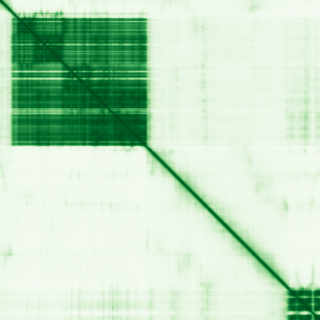

In [ ]:
#@title ##1.&nbsp; Get predicted model from AFDB for an UniProt accession
import requests, json

#@markdown This block will retrieve the data for a UniProt accession and will display the 3D structure with the PAE.
UniProt_accession = "P00520" #@param {type:"string"}
#@markdown Note: For visualising structures with interactive PAE viewer, visist the [AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/api-docs)


!pip install py3Dmol
import py3Dmol
import requests
from IPython.display import display, Image
import json

def visualize_protein(uniprot_accession, color="lDDT"):
    # Function to retrieve protein information by UniProt accession
    def get_protein(uniprot_accession):
        api_endpoint = "https://alphafold.ebi.ac.uk/api/prediction/"
        url = f"{api_endpoint}{uniprot_accession}"  # Construct the URL for API

        try:
            # Use a timeout to handle potential connection issues
            response = requests.get(url, timeout=10)

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                result = response.json()
                return result
            else:
                # Raise an exception for better error handling
                response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Error: {e}")

    # Function to show protein structure and image
    def show_structure_and_image(pdb_url, image_url, color):
        # Retrieve the PDB data from the URL
        pdb_data = requests.get(pdb_url).text

        # Create a 3Dmol.js view
        view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)

        # Add the PDB data to the view
        view.addModel(pdb_data, 'pdb')

        # Set style based on color parameter
        if color == "lDDT":
            view.setStyle({'cartoon': {'colorscheme': {'prop': 'b', 'gradient': 'roygb', 'min': 50, 'max': 90}}})
        elif color == "rainbow":
            view.setStyle({'cartoon': {'color': 'spectrum'}})

        # Zoom to the structure
        view.zoomTo()

        # Display the 3D structure
        display(view)

        # Retrieve and display the PNG image
        image_data = requests.get(image_url).content
        display(Image(data=image_data))


######
    protein_info = get_protein(uniprot_accession)

    if protein_info:
        # Use json.dumps with indent parameter to print formatted JSON
        print(json.dumps(protein_info, indent=2))

        # Extract PDB and PNG URLs
        pdb_url = protein_info[0].get('pdbUrl')
        image_url = protein_info[0].get('paeImageUrl')

        if pdb_url and image_url:
            # Show the protein structure and PNG image side by side
            show_structure_and_image(pdb_url, image_url, color)
        else:
            print("Failed to retrieve PDB or PNG URLs.")
    else:
        print("Failed to retrieve protein information.")

# Example: Replace 'P00520' with the desired UniProt accession
visualize_protein(UniProt_accession)


In [ ]:
#@title ##2.&nbsp; Retrieve several predicted models from AFDB
#@markdown This block will retrieve the data for the UniProt accessions
UniProt_accessions = "P00520, Q5VSL9" #@param {type:"string"}
#@markdown **Note**: While the API is a good option for data retrieval, consider using [Big Query](https://colab.research.google.com/github/paulynamagana/AFDB_notebooks/blob/main/AFDB_BigQuery.ipynb) if you need to download larger datasets (more than 100 files)

def call_api_with_accessions(accessions):
    # Convert the string of accessions to a list
    accession_list = accessions.split(', ')

    # Your API endpoint and other parameters
    api_endpoint = "https://alphafold.ebi.ac.uk/api/prediction/"

    for accession in accession_list:
      url = f"{api_endpoint}{accession}"
    # Make the API request
      try:
        response = requests.get(url, timeout=10)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Process the API response as needed
            result = response.json()
            print(json.dumps(result, indent=2))
        else:
            # Handle unsuccessful API request
            return f"API request failed with status code: {response.status_code}"

      except Exception as e:
        # Handle exceptions, e.g., connection issues
        return f"Error occurred: {str(e)}"

# Example usage
call_api_with_accessions(UniProt_accessions)


[
  {
    "entryId": "AF-P00520-F1",
    "gene": "Abl1",
    "uniprotAccession": "P00520",
    "uniprotId": "ABL1_MOUSE",
    "uniprotDescription": "Tyrosine-protein kinase ABL1",
    "taxId": 10090,
    "organismScientificName": "Mus musculus",
    "uniprotStart": 1,
    "uniprotEnd": 1123,
    "uniprotSequence": "MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTIYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVSAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKRGTRGGAGSMLQAPELPTKTRTCRRAAEQKDAPDTPELLHTKGLGESDALDSEPAVSPLLPRKERGPPDGSLNEDERLLPRDRKTNLFSALIKKKKKMAPTPPKRSSSFREMDGQPDRRGASEDDSRELCNGPPALTSDAAEPTKSPKASNGAGVPNGAFREPGNSGFRSP